1. Implement the intensity transformation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Load the grayscale image

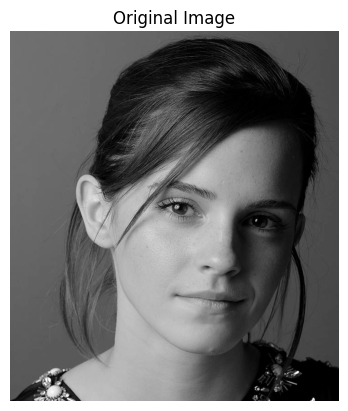

In [6]:
image_path = "a1images/emma.jpg"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis
plt.show()

 lookup table for an intensity transformation

In [8]:
t1 = np.linspace(0, 50, 50).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

lookup_table = np.concatenate([t1, t2, t3])

visually represents the lookup table

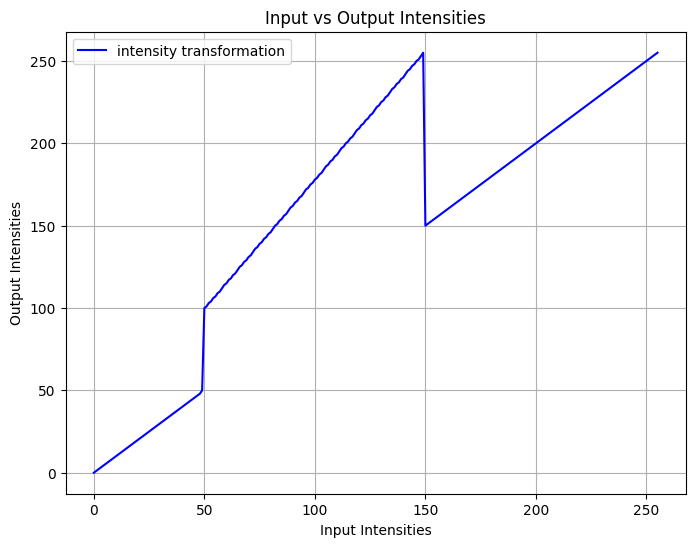

In [9]:
#input intensities
input_intensities = np.arange(256)

#plot input and output intensities
plt.figure(figsize=(8,6))
plt.plot(input_intensities, lookup_table, color='blue', label="intensity transformation")
plt.title('Input vs Output Intensities')
plt.xlabel('Input Intensities')
plt.ylabel('Output Intensities')
plt.grid(True)
plt.legend()
plt.show()

Appy Transformation

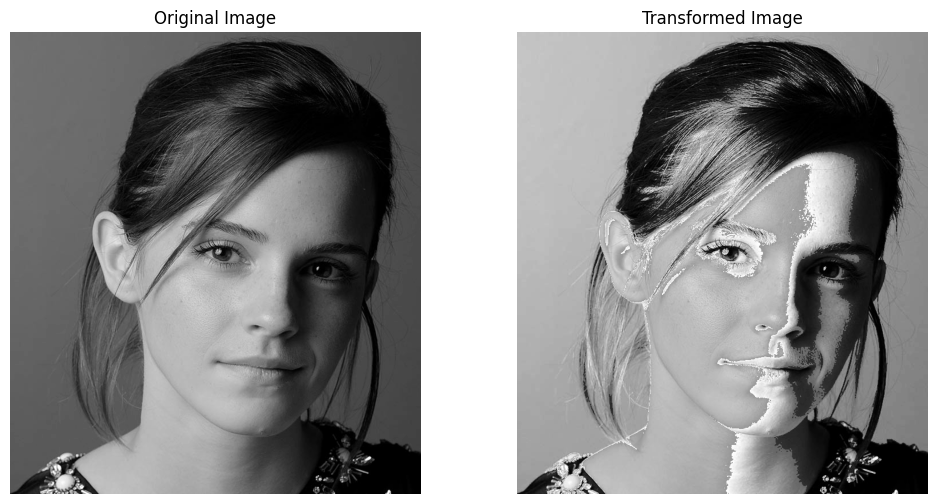

In [10]:
image_transformed = cv.LUT(image, lookup_table)

# Display original and transformed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

2.Accentuate white and grey matter

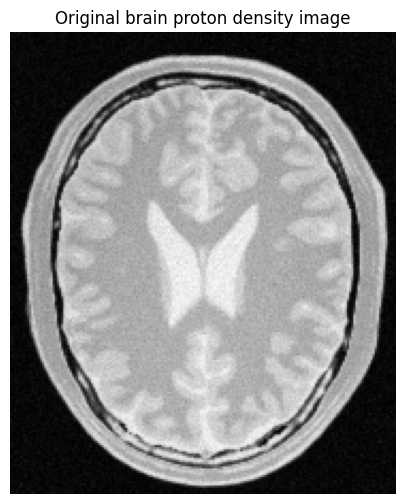

In [12]:
image_path_2 = "a1images/brain_proton_density_slice.png"
brain_image = cv.imread(image_path_2, cv.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(brain_image, cmap='gray')
plt.title('Original brain proton density image')
plt.axis('off')  # Hide axis
plt.show()

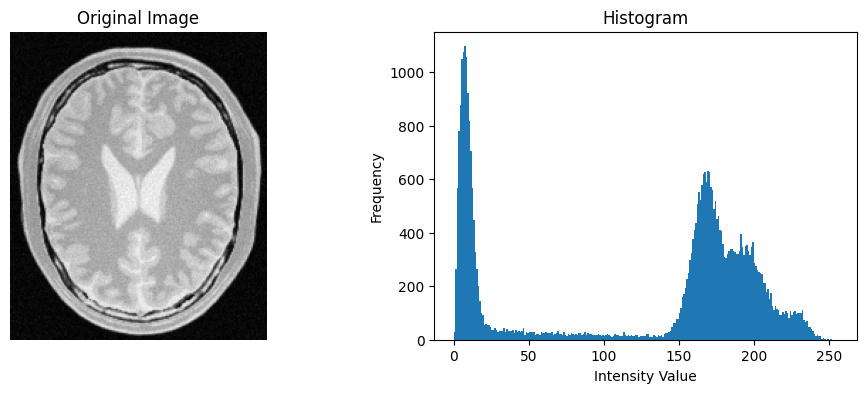

In [ ]:
# Display histogram of the original image
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(brain_image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].hist(brain_image.ravel(), 256, [0, 256])
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

Typical Intensity Characteristics in PD Images:

White Matter (WM): Usually has lower proton density, so it appears darker than grey matter.

Grey Matter (GM): Has a higher proton density than white matter, so it appears brighter than white matter.

Cerebrospinal Fluid (CSF): Has the highest proton density, so it appears brightest.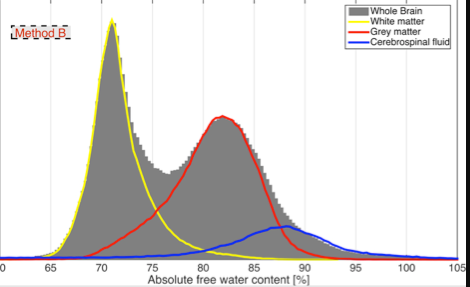

In histogram we can see,          
          
A big peak for background (dark intensities near 0).

A medium peak for white matter (lower-mid intensities).

A brighter peak for grey matter.

Possibly a small peak at high intensities for CSF or bright artifacts.

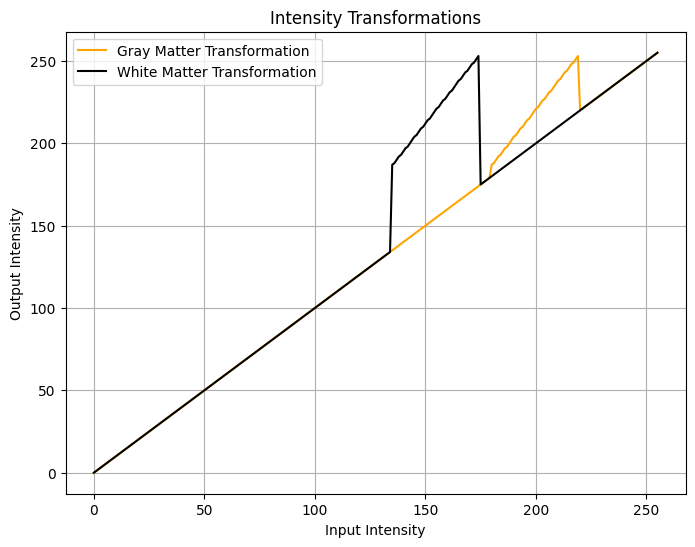

In [48]:
# plot intensity transformation of white and gray matter on same plot
input_intensity = np.arange(256)
output_intensity_gray = np.copy(input_intensity)
output_intensity_gray[180:220] = 1.7 * output_intensity_gray[180:220] - 119

output_intensity_white = np.copy(input_intensity)
output_intensity_white[135:175] = 1.7 * output_intensity_white[135:175] -42.5

plt.figure(figsize=(8, 6))
plt.plot(input_intensity, output_intensity_gray, label='Gray Matter Transformation', color='orange')
plt.plot(input_intensity, output_intensity_white, label='White Matter Transformation', color='black')

plt.title('Intensity Transformations')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()
plt.show()

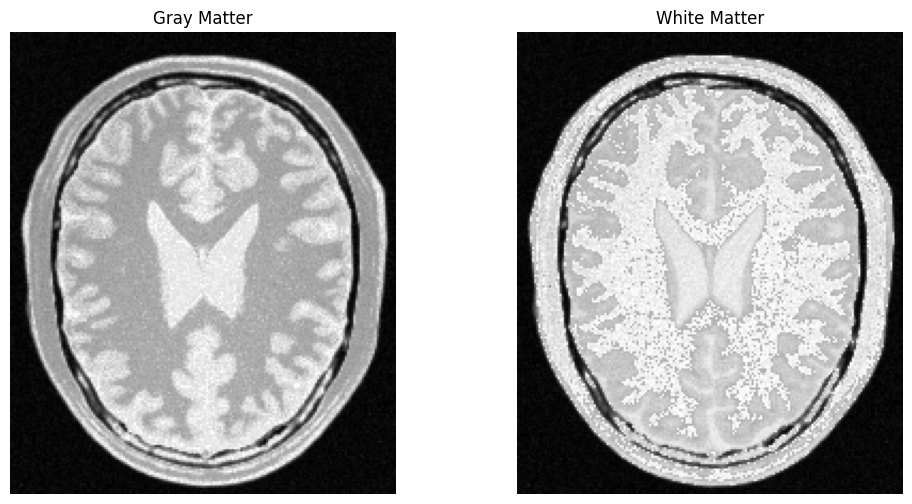

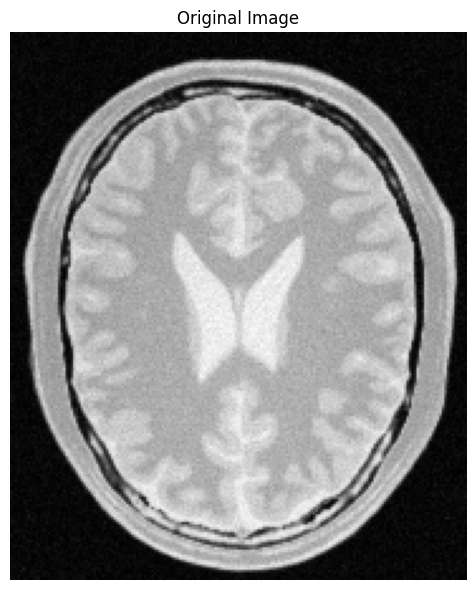

In [52]:
def accentuate_matter(image):
    # Create a copy of image
    image_accentuated_grey = np.copy(image)

    #Apply transformation for gray matter 150 to 180
    gray_matter_mask = (image >= 180) & (image <= 220)
    image_accentuated_grey[gray_matter_mask] = 1.7 * image_accentuated_grey[gray_matter_mask] - 119

    image_accentuated_white = np.copy(image)
    # Apply transformation for white matter 100 to 250
    white_matter_mask = (image >= 135) & (image <= 175)
    image_accentuated_white[white_matter_mask] = 1.7 * image_accentuated_white[white_matter_mask] - 42.5

    return image_accentuated_grey, image_accentuated_white

# Apply the accentuation transformation
image_accentuated_grey, image_accentuated_white = accentuate_matter(brain_image)

# Display the masks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_accentuated_grey, cmap='gray')
plt.title("Gray Matter")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_accentuated_white, cmap='gray')
plt.title("White Matter")
plt.axis('off')

# Display the original and transformed images side by side
plt.figure(figsize=(6, 6))
plt.imshow(brain_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()

3.Gamma Correction

Gamma Correction with gamma=0.5

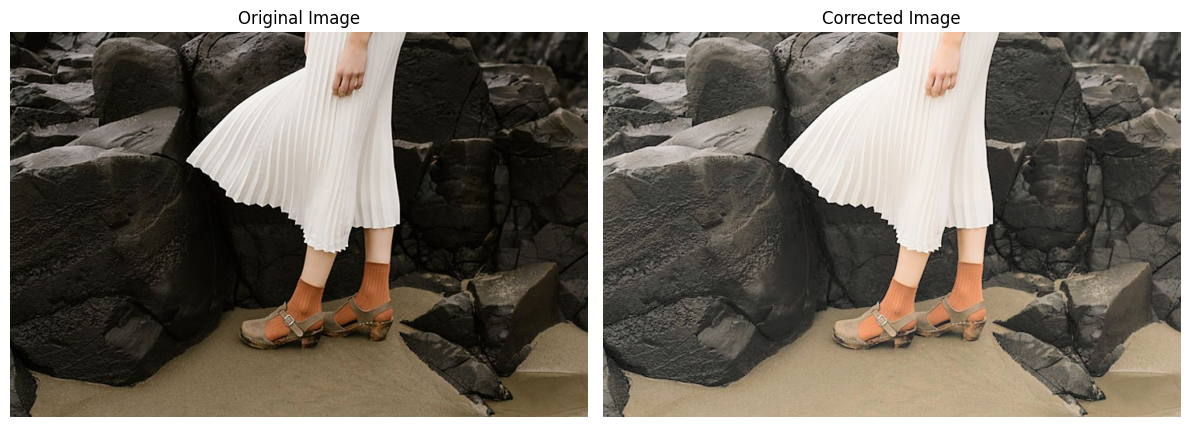

In [ ]:
# 1. Read the image 
image_path_3 = 'a1images/highlights_and_shadows.jpg'
image = cv.imread(image_path_3)               # BGR format by default in OpenCV
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert to RGB

# 2. Convert to L*a*b* color space
lab_image = cv.cvtColor(image_rgb, cv.COLOR_RGB2LAB)

# Split into channels
L, a, b = cv.split(lab_image)

# Convert L from 0-255 to 0-1 for gamma correction
L_norm = L / 255.0

# 3. Apply gamma correction to L channel
gamma = 0.5  
L_corrected = np.power(L_norm, gamma)

# Scale back to 0-255
L_corrected = np.uint8(np.clip(L_corrected * 255, 0, 255))

# Merge corrected L with original a and b
lab_corrected = cv.merge((L_corrected, a, b))

# Convert back to RGB for display
image_corrected_rgb = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

#Display original and corrected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_corrected_rgb)
plt.title("Corrected Image")
plt.axis('off')

plt.tight_layout()
plt.show()


Histograms of the original and corrected images

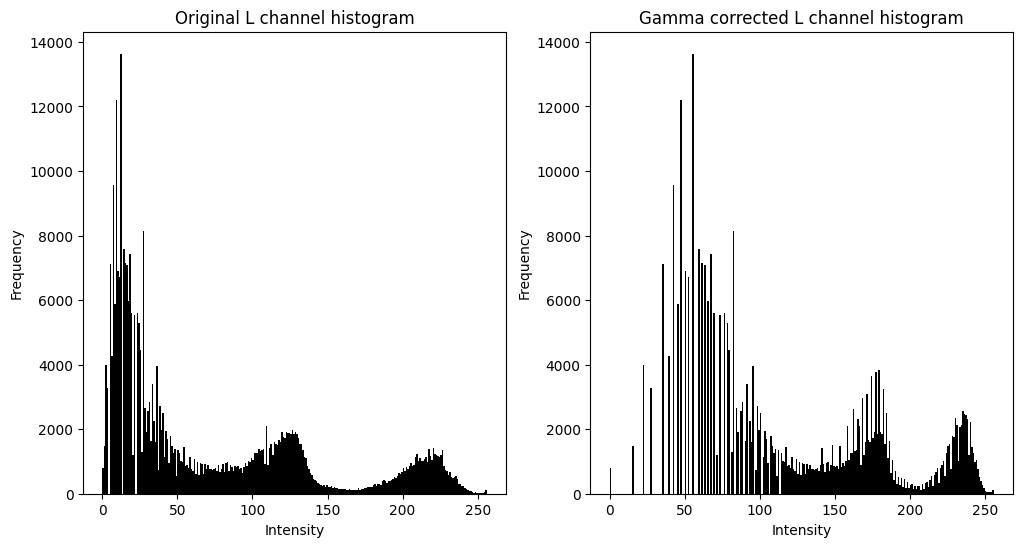

In [59]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(L.ravel(), 256, [0, 256], color='black')
plt.title('Original L channel histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Histogram of corrected L channel
plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), 256, [0, 256], color='black')
plt.title('Gamma corrected L channel histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()


4.Enhance the vibrance

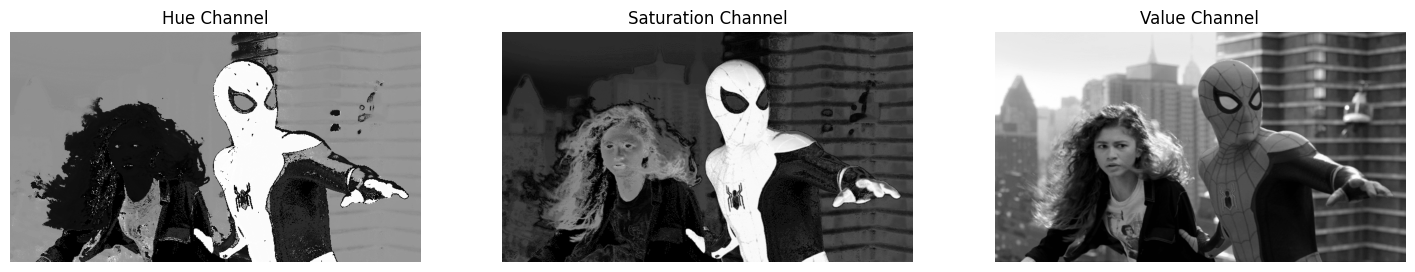

In [62]:
# 1. Read the image (OpenCV loads in BGR)
image_path_4 = 'a1images/spider.png'
image_bgr = cv.imread(image_path_4)
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

# 2. Convert to HSV
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

# Split into Hue, Saturation, Value
H, S, V = cv.split(image_hsv)

# Display the H, S, and V channels
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.show()

Testing for different 'a' values

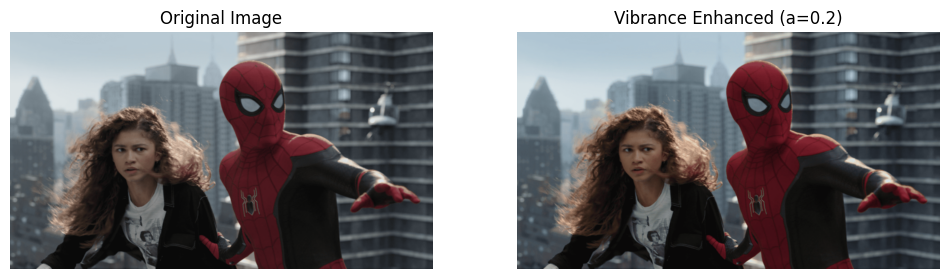

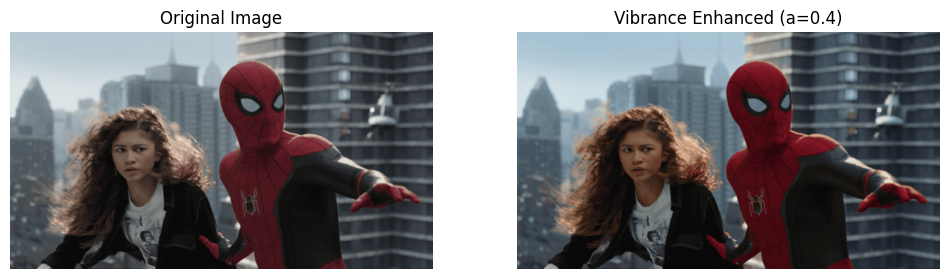

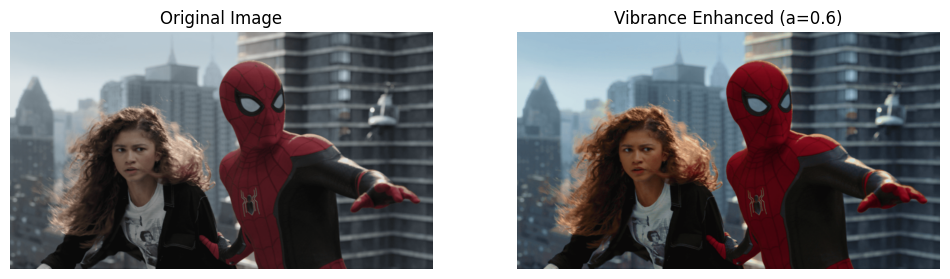

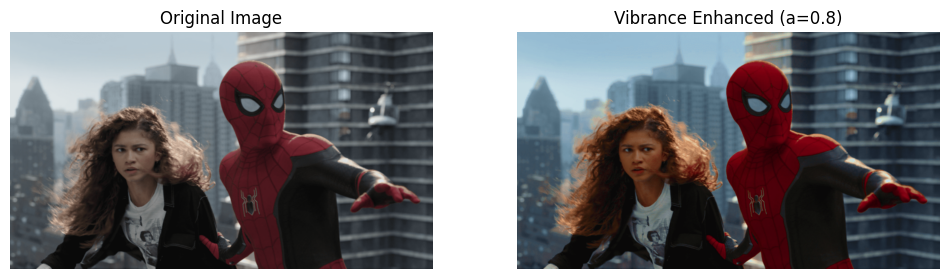

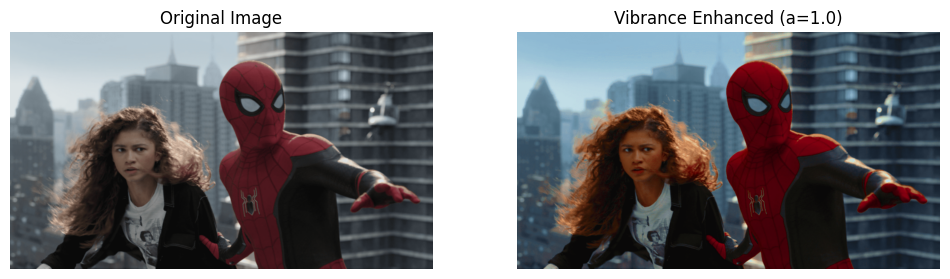

In [65]:
# 3. Apply the given intensity transformation to the Saturation channel
# Parameters
sigma = 70

for a in [0.2,0.4,0.6,0.8,1.0]:
    # Convert to float for calculation
    S_float = S.astype(np.float32)

    # Transformation function:
    # f(x) = min( x + a*128*exp(-(x-128)^2 / (2*sigma^2)), 255 )
    transformed_S = S_float + a * 128 * np.exp(-((S_float - 128)**2) / (2 * sigma**2))
    transformed_S = np.clip(transformed_S, 0, 255).astype(np.uint8)

    # 4. Recombine H, transformed S, and V
    hsv_transformed = cv.merge((H, transformed_S, V))

    # Convert back to RGB for display
    image_vibrance = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2RGB)

    # 5. Plot results
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Vibrance enhanced image
    plt.subplot(1, 2, 2)
    plt.imshow(image_vibrance)
    plt.title(f'Vibrance Enhanced (a={a})')
    plt.axis('off')


Choosing a=0.5

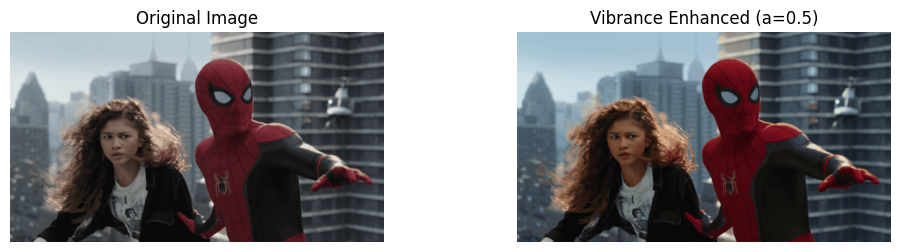

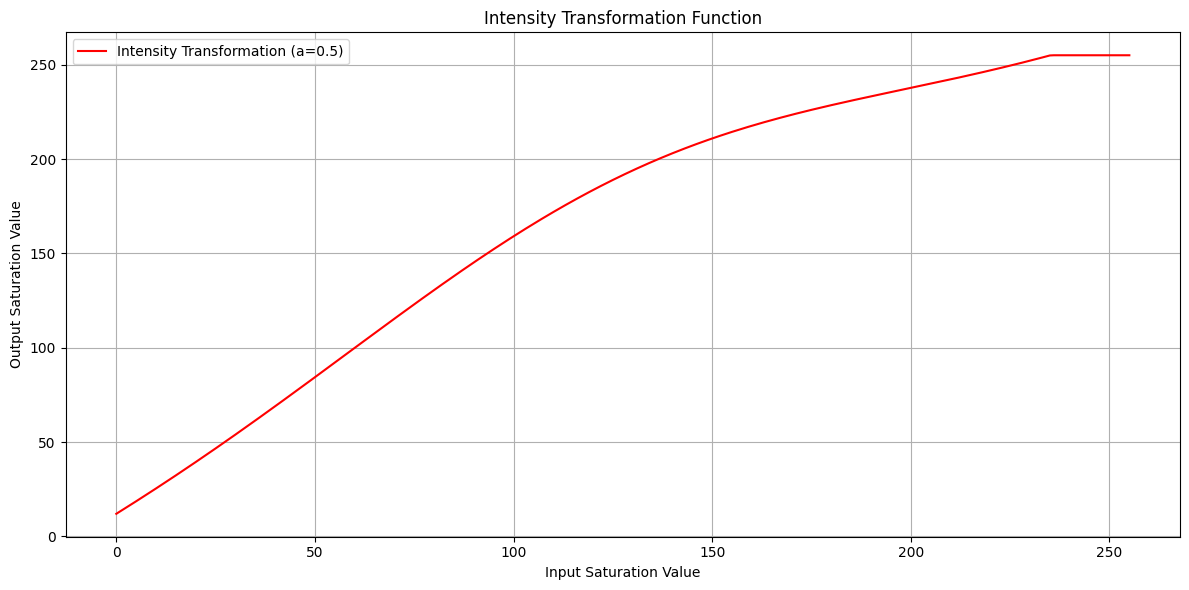

In [67]:
a = 0.5
sigma = 70

# Convert to float for calculation
S_float = S.astype(np.float32)

# Transformation function:
# f(x) = min( x + a*128*exp(-(x-128)^2 / (2*sigma^2)), 255 )
transformed_S = S_float + a * 128 * np.exp(-((S_float - 128)**2) / (2 * sigma**2))
transformed_S = np.clip(transformed_S, 0, 255).astype(np.uint8)

# 4. Recombine H, transformed S, and V
hsv_transformed = cv.merge((H, transformed_S, V))

# Convert back to RGB for display
image_vibrance = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2RGB)

# 5. Plot results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Vibrance enhanced image
plt.subplot(2, 2, 2)
plt.imshow(image_vibrance)
plt.title(f'Vibrance Enhanced (a={a})')
plt.axis('off')

# Transformation curve
x = np.arange(256)
f_x = np.clip(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 0, 255)

plt.figure(figsize=(12, 6))
plt.plot(x, f_x, color='red', label=f'Intensity Transformation (a={a})')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Saturation Value')
plt.ylabel('Output Saturation Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

5.Histogram equalization

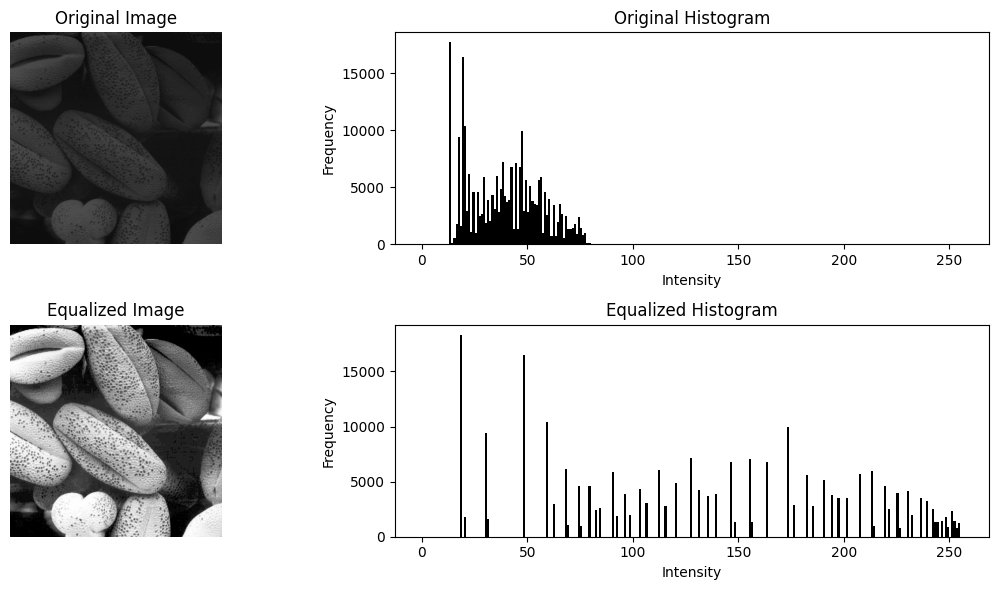

In [70]:
def my_hist_equalization(image):
    """ for a single-channel (grayscale) image."""
    # Flatten the image to 1D
    flat = image.flatten()
    
    # Step 1: Compute histogram
    hist = np.bincount(flat, minlength=256)
    
    # Step 2: Compute normalized cumulative histogram (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # divide by total number of pixels
    
    # Step 3: Map original intensities to equalized ones
    equalized = np.floor(255 * cdf_normalized[flat]).astype(np.uint8)
    
    # Reshape to original image shape
    return equalized.reshape(image.shape)

# 1. Load image (convert to grayscale)
image_path_5 = 'a1images/shells.tif'
image_bgr = cv.imread(image_path_5)
image_gray = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)

# 2. Apply custom histogram equalization
equalized_image = my_hist_equalization(image_gray)

# 3. Plot results
plt.figure(figsize=(12, 6))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(image_bgr, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(image_gray.ravel(), 256, [0, 256], color='black')
plt.title("Original Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), 256, [0, 256], color='black')
plt.title("Equalized Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

6.Only equalizing the foreground

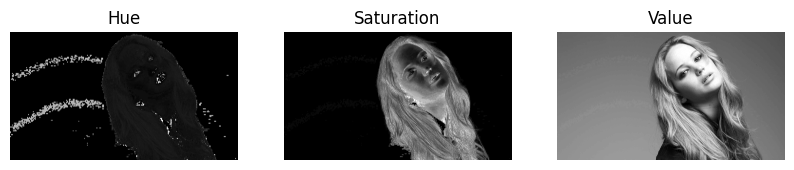

In [72]:
# ===== (a) Read image and split into HSV =====
image_path_6 = 'a1images/jeniffer.jpg'
image_bgr = cv.imread(image_path_6)
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
H, S, V = cv.split(image_hsv)

# Display H, S, V in grayscale
plt.figure(figsize=(10, 4))
for i, (plane, title) in enumerate(zip([H, S, V], ['Hue', 'Saturation', 'Value'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(plane, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()


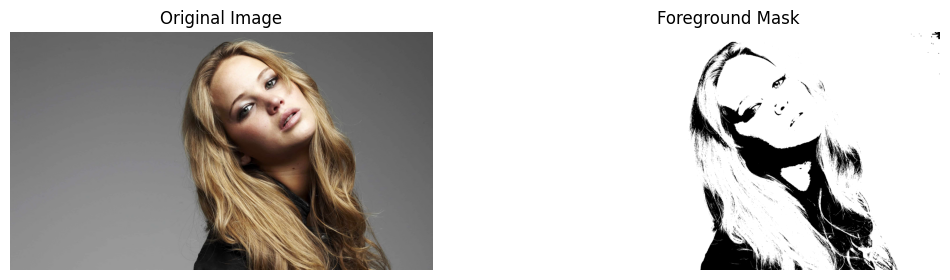

In [74]:
# ===== (b) Threshold to create foreground mask =====
# Here we threshold the V plane (adjust value based on image)
_, mask = cv.threshold(V, 80, 255, cv.THRESH_BINARY)

plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis('off')

plt.show()

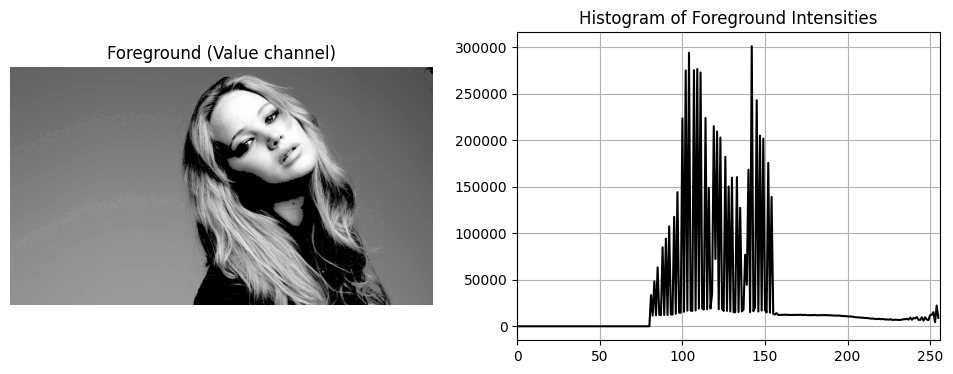

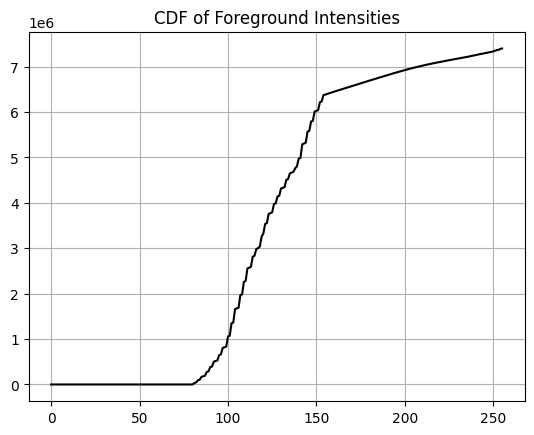

In [85]:
# ===== (c) Extract foreground using bitwise_and =====
foreground = cv.bitwise_and(V, V, mask=mask)
#Histogram of the foreground
hist = cv.calcHist([foreground], [0], mask, [256], [0, 256]).flatten()

plt.figure(figsize=(12, 4))

# foreground
plt.subplot(1, 2, 1)
plt.imshow(foreground, cmap='gray')
plt.title("Foreground (Value channel)")
plt.axis('off')

# histogram
plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title("Histogram of Foreground Intensities")
plt.xlim([0, 256])
plt.grid(True)

plt.show()

# ===== (d) cumulative sum of the histogram =====
cdf = np.cumsum(hist)
# CDF plot
plt.figure()
plt.plot(cdf, color='black')
plt.title("CDF of Foreground Intensities")
plt.grid(True)
plt.show()

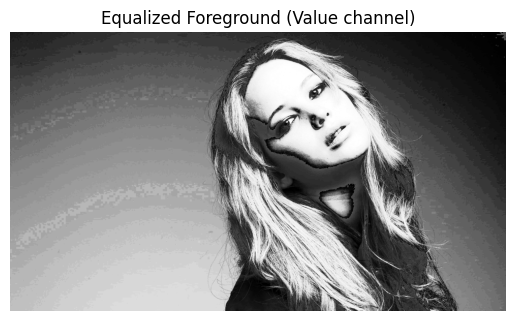

In [86]:
# ===== (e) Histogram equalization (manual) =====
L = 256
MN = np.sum(mask > 0)  # number of foreground pixels
t = np.array([(L-1)/(MN) * cdf[k] for k in range(256)], dtype=np.uint8)

# Apply mapping only to foreground pixels
V_equalized = V.copy()
V_equalized[mask > 0] = t[V[mask > 0]]

# Histogram-equalized foreground
plt.figure()
plt.imshow(V_equalized, cmap='gray')
plt.title("Equalized Foreground (Value channel)")
plt.axis('off')
plt.show()

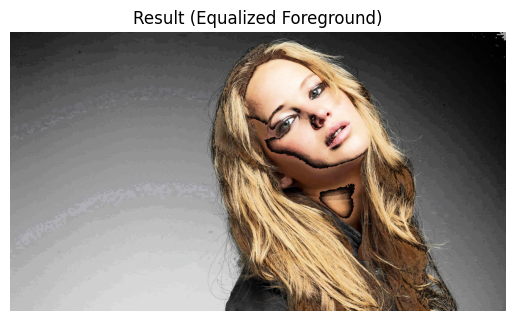

In [87]:
# ===== (f) Combine equalized foreground with background =====
background = cv.bitwise_and(V, V, mask=cv.bitwise_not(mask))
V_combined = cv.add(background, V_equalized)

# Merge back into HSV and convert to RGB
final_hsv = cv.merge((H, S, V_combined))
final_rgb = cv.cvtColor(final_hsv, cv.COLOR_HSV2RGB)

# Final combined result
plt.figure()
plt.imshow(final_rgb)
plt.title("Result (Equalized Foreground)")
plt.axis('off')
plt.show()